# Opioid Data
HW #2 Part 1 - Dimensionality Reduction.  
Use one summary vector per patient, specifically the monthly average per patient.  

## Preprocessing
Patient files are in one of two directories: R or NR.  
Each patient is represented by one CSV file.  
Each row of each CSV contains readings from one day.    
Here, we load each patient average across all days.   

In [1]:
from os import listdir
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from matplotlib import colors
mycmap = colors.ListedColormap(['red','blue'])  # list color for label 0 then 1
np.set_printoptions(precision=2)

In [2]:
pathR='data/ChunkedData_R/'
pathN='data/ChunkedData_NR/'
filesR = listdir(pathR)
filesN = listdir(pathN)
print(len(filesR)," files of type R")
print(len(filesN)," files of type N")
CLASS_SEPARATOR=13  # data[:13] vs data[13:]
WITH_VARIANCE_COLUMNS=True   # Use mean and variance per patient

14  files of type R
26  files of type N


In [3]:
# Read one CSV file. 
# Create a Pandas data frame.
# Drop the date column.
def file_mean (filepath):
    mydata = pd.read_csv(filepath)
    # Drop the date column.
    mydata = mydata.drop('Date',axis=1) 
    mcols = [name+'M' for name in mydata.columns]
    vcols = [name+'V' for name in mydata.columns]
    # Transpose column of mean values into a row.
    mymean = mydata.mean(axis=0).to_frame().T
    mymean.columns=mcols
    myvar = mydata.var(axis=0).to_frame().T
    myvar.columns=vcols
    return mymean,myvar

In [4]:
# Read directory of CSV files (R or NR). 
# Create one dataframe representing all files.
# Retain only one row per file = column averages.
def mean_per_file (directory,variance):
    files = listdir(directory)
    means = pd.DataFrame()
    for fp in files:
        dfp = directory+fp
        m,v = file_mean(dfp)
        m_v = pd.concat([m,v],axis=1)
        # Let Pandas number the rows sequentially.
        means = means.append(m_v,ignore_index=True)
    return means

In [5]:
meansR = mean_per_file(pathR,WITH_VARIANCE_COLUMNS)
meansR.describe()

,Morning_Question1M,Morning_Question2M,Morning_Question3M,Morning_Question4M,Morning_Question5M,Morning_Question6M,Afternoon_Question1M,Afternoon_Question2M,Afternoon_Question3M,Afternoon_Question4M,...,HR_meanV,HR_varV,HR_stdV,HR_skV,HR_kuV,Stress_meanV,Stress_varV,Stress_stdV,Stress_skV,Stress_kuV
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2.771630,2.704766,3.684239,3.427975,2.393328,4.368998,3.686286,3.513472,2.736801,2.429426,...,34.372227,7795.079795,11.157802,0.211735,5.429303,130.564141,44286.087904,26.996662,0.445166,4.972088
std,1.339235,1.115521,1.206275,1.113369,0.893719,0.702195,1.221645,1.272435,1.147496,1.152266,...,25.631061,6375.381932,7.541068,0.213722,15.155830,82.871183,32614.389556,17.636954,0.325842,7.017045
min,1.000000,1.000000,1.000000,1.310345,1.517241,2.517241,1.000000,1.000000,1.000000,1.000000,...,8.742554,475.972601,1.425214,0.088300,0.204720,23.255380,12172.325488,9.331900,0.171789,0.642274
25%,1.956981,2.169643,3.302760,2.539577,1.972222,3.958128,2.908279,3.087662,1.551724,1.310345,...,17.234079,2037.723414,4.796564,0.121842,1.153600,71.312686,19172.381140,11.966783,0.261594,1.930655
50%,2.857759,2.393939,3.928480,3.847222,2.064394,4.403941,4.000000,3.772727,3.000000,2.214286,...,28.815820,7134.524178,12.062591,0.145488,1.624992,108.744908,33891.228153,25.255710,0.356057,2.724132
75%,3.435737,3.758621,4.419540,4.000000,2.423701,4.979167,4.713362,4.326149,3.772727,3.607955,...,38.449174,12748.013510,14.740333,0.215462,1.865365,158.278579,57409.457138,34.926301,0.467254,4.274385
max,5.000000,4.448276,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.035714,3.962963,...,102.064435,19352.257310,26.517144,0.930167,58.042538,314.010811,127562.172736,75.155578,1.454651,28.194354


In [6]:
meansN = mean_per_file(pathN,WITH_VARIANCE_COLUMNS)
meansN.describe()

,Morning_Question1M,Morning_Question2M,Morning_Question3M,Morning_Question4M,Morning_Question5M,Morning_Question6M,Afternoon_Question1M,Afternoon_Question2M,Afternoon_Question3M,Afternoon_Question4M,...,HR_meanV,HR_varV,HR_stdV,HR_skV,HR_kuV,Stress_meanV,Stress_varV,Stress_stdV,Stress_skV,Stress_kuV
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2.982123,2.888846,4.235503,3.537182,2.198923,4.308005,4.279549,4.207332,3.086296,2.498761,...,35.401291,7463.312024,8.824132,0.285265,3.720685,130.966486,35508.104155,21.904656,0.535252,7.537642
std,1.295793,1.195432,0.749181,1.094154,1.225848,0.605677,0.759156,0.893941,1.475356,1.406318,...,22.922819,8416.222926,7.059484,0.258522,5.251969,94.425443,24507.102981,10.768108,0.375209,9.427802
min,1.000000,1.000000,2.241379,1.000000,1.000000,3.375000,2.655172,1.965517,1.000000,1.000000,...,3.212049,409.131542,0.840543,0.041430,0.217647,5.562469,3236.258881,4.705337,0.093928,0.240426
25%,1.648348,2.206897,4.000000,2.969109,1.086207,3.758621,3.612069,3.810345,1.140445,1.000000,...,18.004090,1061.647756,3.483471,0.122933,0.701214,56.731256,18855.312756,11.732004,0.251583,2.534023
50%,3.465517,3.155093,4.162835,3.885776,2.035714,4.275223,4.431034,4.362069,3.716236,2.379310,...,29.436331,3830.952644,7.010226,0.193542,1.443744,115.407096,30205.448898,23.339835,0.411815,4.039925
75%,3.982759,3.913793,4.965517,4.000000,3.017241,4.913793,5.000000,5.000000,4.000000,3.721675,...,47.896306,9733.137191,11.406218,0.353734,4.772151,175.495580,50924.747490,30.802759,0.672522,8.697156
max,4.931034,4.555556,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,78.579913,27765.514599,24.774942,1.031303,22.879166,336.939869,94124.034377,40.365547,1.407404,39.377742


In [7]:
# Combine all data (R and NR) into one data frame.
# Label R = positive = 1 = blue.
# Label NR = negative = 0 = red.
def make_labels(positives,negatives):
    rows = positives.shape[0]
    labelsP = pd.DataFrame(np.ones(rows,dtype=np.int8))  # one = blue
    rows = negatives.shape[0]
    labelsN = pd.DataFrame(np.zeros(rows,dtype=np.int8))  # zero = red
    labelsAll = pd.concat((labelsP,labelsN),ignore_index=True)
    return labelsAll

In [8]:
meansAll = pd.concat((meansR,meansN),ignore_index=True)
meansAll.shape
labels_df = make_labels(meansR,meansN)
#print(labels_df.T)
meansR = None
meansN = None

## Scaling and covariance
Normalize by subtracting the column mean from every column value.  
Since columns have widely different numerical ranges,   
also normalize by making each column have unit variance.  
Note: without normalization, the covariance plot would be all black except for the few features with large absolute values.

In [9]:
# Standardize features by shifting the mean to zero and scaling to unit variance.
def scale_features(X):
    s = StandardScaler()
    z = s.fit_transform(X)
    return z
scaledMeans = scale_features(meansAll)

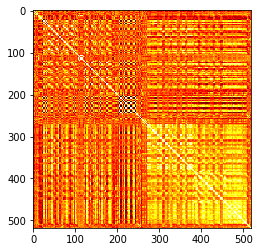

In [10]:
def plot_covariance(X):
    cv=X.T.dot(X)/len(X)
    plt.imshow(cv, cmap='hot', interpolation='nearest')
    plt.show()
plot_covariance(scaledMeans)

## Principal Component Analysis (PCA)
PCA is an example of unsupervised learning.
PCA does dimensionality reduction by a linear transformation
to orthogonal axes where each successive axis 
captures most of the remaining variance.  

It is important to normalize first.
Otherwise, most variance will be explained by those columns with large absoulte values.
That was our mistake in HW #1, when 67% of variance was explained by PC1.  
We will examine prinicpal components 1, 2, 3.

In [11]:
def show_PC_variance_explained(model):
    # Assumes at least 3 principal components, or else crashes.
    e1,e2,e3=model.explained_variance_ratio_[:3]*100.0
    print("Variance explained by PC1=%.2f%% PC2=%.2f%% PC3=%.2f%%"%(e1,e2,e3))
def show_PC_eigenvalues(model):
    e1,e2,e3=model.lambdas_[:3]
    print("Eigenvalues EV1=%.2f EV2=%.2f EV3=%.2f"%(e1,e2,e3))
def construct_PCA():
    # Use the PCA class from sklearn.
    # Linear dimensionality reduction using Singular Value Decomposition.
    # This is unsupervised learning (but we'll use labels for visualization).
    # Every transform returns a COPY of the data; see copy parameter.
    # Does centering (setting mean = 0); no way to disable this.
    # Does not do scaling (setting variance = 1); no way to enable this.
    # Does NOT do whitening (setting variance = covariance = 1); see whitening parameter.
    # When n_components = None, PCA uses min(features,instances).
    # Can also be set to 'mle' or min percent of variance to explain.
    model = PCA()
    return model

In [12]:
print("PCA of total feature space:")
pca=construct_PCA()
pca.fit(scaledMeans)
show_PC_variance_explained(pca)
P_transformed=pca.fit_transform(scaledMeans)
print("Shape of transformed data",P_transformed.shape)

PCA of total feature space:
Variance explained by PC1=27.42% PC2=11.37% PC3=6.55%
Shape of transformed data (40, 40)


## Linear Discriminant Analysis (LDA)
LDA is a classification algorithm. 
LDA is an example of supervised learning.
LDA finds a linear decision boundary.

LDA can be used for dimensionality reduction.
It projects the data onto some number of axes 
that most discriminate between the classes.
The maximum number of dimensions is n_classes-1. 

In [13]:
def construct_LDA():
    # A classifier with a linear decision boundary, 
    # generated by fitting class conditional densities 
    # to the data and using Bayes’ rule.
    # Assumes a Gaussian density for each class.
    # Assumes that all classes share the same covariance matrix.
    # Solver = 'svd' (default), 'lsqr', or 'eigen'.
    # By default, priors are inferred from inputs.
    # By default, n_components = None, and LDA uses min(features,classes-1).  
    # It is possible to ask LDA for the means, classes, priors,
    # variance explained, decision boundary line, and within-class covariance.
    return LinearDiscriminantAnalysis()

In [14]:
# Must use ravel() to convert shape (40,1) to (40,).
labels_ravel=np.ravel(labels_df)
lda=construct_LDA()
training = cross_validate(lda, scaledMeans, labels_ravel, cv=5)
training['test_score']

array([0.38, 0.38, 0.88, 0.5 , 0.75])

In [15]:
print("LDA of total feature space:")
lda.fit(scaledMeans,labels_ravel)
# The linear decision boundary is a (n_features)-dimensional vector.
print("Shape of decision boundary",lda.coef_.shape)
L_transformed = lda.transform(scaledMeans)
# The transformed data is (n_classes-1)-dimensional i.e. 1D.
print("Shape of transformed data",L_transformed.shape)

LDA of total feature space:
Shape of decision boundary (1, 518)
Shape of transformed data (40, 1)


## HW2.1.a: Comparison of PCA vs LDA
The LDA has more information, specifically, the labels.
Also, since we have only two classes, the LDA must perform maximum separation on one axis.
Thus, it is not surprising that the LDA achieves greater separation 
compared to the first principal component.

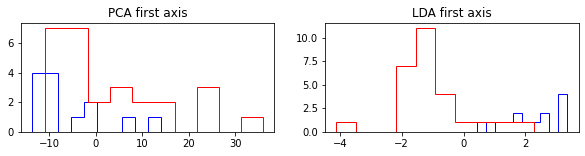

In [16]:
fig1 = plt.figure(figsize=(10,2)) 
ax1 = fig1.add_subplot(121)
ax1.set_title('PCA first axis')
# Extract list of PC1 coordinate for each of 40 intances.
pc1_coords = [c[0] for c in P_transformed]
ax1.hist(pc1_coords[:CLASS_SEPARATOR],histtype='step',color='blue') 
ax1.hist(pc1_coords[CLASS_SEPARATOR:],histtype='step',color='red')  
ax2 = fig1.add_subplot(122)
ax2.set_title('LDA first axis')
ax2.hist(L_transformed[:CLASS_SEPARATOR],histtype='step',color='blue') 
ax2.hist(L_transformed[CLASS_SEPARATOR:],histtype='step',color='red')  
plt.show()

## HW2.1.b: Discussion of PCA

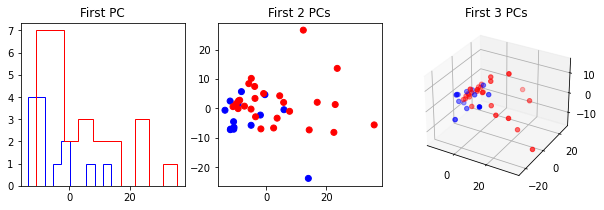

In [17]:
def plot_PCA (transformed,labels):  
    lims=[-5,5]  #  Use this if defaults don't work:   ax1d.set_xlim(lims)
    fig = plt.figure(figsize=(10,3))
    #pc1,pc2,pc3 = np.split(transformed,3,axis=1)  # crashes if n_components != 3
    pc1 = [c[0] for c in transformed]
    pc2 = [c[1] for c in transformed]
    pc3 = [c[2] for c in transformed]
    # Plot first PC as histogram
    ax1d = fig.add_subplot(131)
    ax1d.set_title('First PC')
    ax1d.hist(pc1[:CLASS_SEPARATOR],histtype='step',color='blue')  
    ax1d.hist(pc1[CLASS_SEPARATOR:],histtype='step',color='red')  
    # Plot first 2 PCs in 2D. 
    ax2d = fig.add_subplot(132)
    ax2d.set_title('First 2 PCs')
    ax2d.scatter(pc1,pc2,c=labels,cmap=mycmap)
    # Plot first 3 PCs in 3D.
    ax3d = fig.add_subplot(133,projection='3d')
    ax3d.set_title('First 3 PCs')
    ax3d.scatter(pc1,pc2,pc3,c=labels,cmap=mycmap)
    # Output to screen.
    plt.show()
plot_PCA(P_transformed,labels_df)

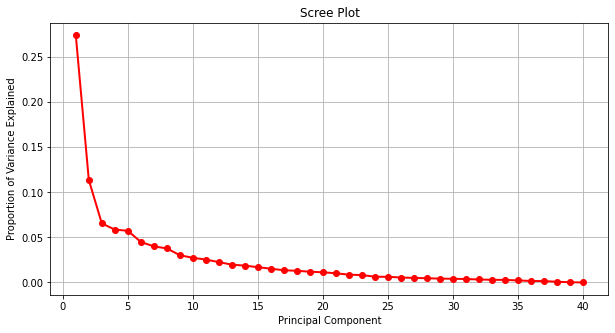

In [18]:
def plot_scree(model):
    pc_values = np.arange(model.n_components_) + 1
    plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(pc_values, model.explained_variance_ratio_, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Proportion of Variance Explained')
    plt.grid()
    plt.show()
plot_scree(pca)

In [19]:
print("Principal components (count,dimensions):",pca.components_.shape)

print("Additional variance explained, per principal component (first 10):")
for pc in range(0,10):
    print("%d=%.3f "%(pc+1,pca.explained_variance_ratio_[pc]),end=" ")
print()

print("Cumulative variance explained, per principal component (first 10):")
sum = 0.0
for pc in range(0,10):
    sum += pca.explained_variance_ratio_[pc]
    print("%d=%.3f "%(pc+1,sum),end=" ")
print()

def print_top_ten_features(pc,cols,cmps):
    NUM=10
    print("PC%d top ten features"%pc)
    n_features=len(cols)
    mylist=[]
    for i in range(0,n_features):
        name = cols[i]
        weight = cmps[pc-1][i]
        triple = (i,name,np.abs(weight))   
        mylist.append(triple)
    myary = np.array(mylist,dtype=[('index',int),('name','S30'),('weight',float)])
    sorted = np.sort(myary,order='weight')
    for i in range(1,NUM+1):
        val = sorted[-i]  # start at end and work to front
        print("  # %3i (%30s) %7.4f"%(val[0],val[1],val[2]))
print_top_ten_features(1,meansAll.columns,pca.components_)
print_top_ten_features(2,meansAll.columns,pca.components_)
print_top_ten_features(3,meansAll.columns,pca.components_)

Principal components (count,dimensions): (40, 518)
Additional variance explained, per principal component (first 10):
1=0.274  2=0.114  3=0.065  4=0.059  5=0.057  6=0.045  7=0.040  8=0.038  9=0.030  10=0.027  
Cumulative variance explained, per principal component (first 10):
1=0.274  2=0.388  3=0.453  4=0.512  5=0.569  6=0.614  7=0.654  8=0.692  9=0.722  10=0.750  
PC1 top ten features
  # 127 (      b'NBack_RT_variance_PMM')  0.0766
  # 477 (            b'NBack0_FA_AMPMV')  0.0743
  # 130 (           b'NBack_RT_std_PMM')  0.0743
  #  97 (b'Flanker(Neu)_RT_variance_PMM')  0.0739
  # 144 (     b'NBack0_RT_variance_AMM')  0.0739
  # 126 (      b'NBack_RT_variance_AMM')  0.0738
  # 480 (      b'NBack0_Accuracy_AMPMV')  0.0729
  # 147 (          b'NBack0_RT_std_AMM')  0.0726
  #  82 (    b'Flanker(Con)_RT_std_PMM')  0.0724
  # 488 (              b'NBack1_FA_PMV')  0.0722
PC2 top ten features
  # 120 (          b'NBack_RT_mean_AMM')  0.1114
  # 123 (        b'NBack_RT_median_AMM')  0.1100
